In [1]:
# Importing all necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data

In [3]:
df = pd.read_csv('Train.csv')
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
# Data Cleaning

In [6]:
X.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
y.isnull().sum()

0

In [8]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer1.fit(X[['Item_Weight']])
X[['Item_Weight']] = imputer1.transform(X[['Item_Weight']])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imputer2.fit(X[['Outlet_Size']])
X[['Outlet_Size']] = imputer2.transform(X[['Outlet_Size']])

In [9]:
print(pd.isnull(X).sum())

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [11]:
# EDA (Exploratory Data Analysis)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [13]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867
std,4.226124,0.051598,62.275067,8.371760
min,4.555000,0.000000,31.290000,1985.000000
25%,9.310000,0.026989,93.826500,1987.000000
50%,12.857645,0.053931,143.012800,1999.000000
75%,16.000000,0.094585,185.643700,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [15]:
cat=X.select_dtypes(include='object')
print(cat.columns)

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [16]:
num=X.select_dtypes(include=['int64','float64'])
print(num.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


In [17]:
# Data Visualization 

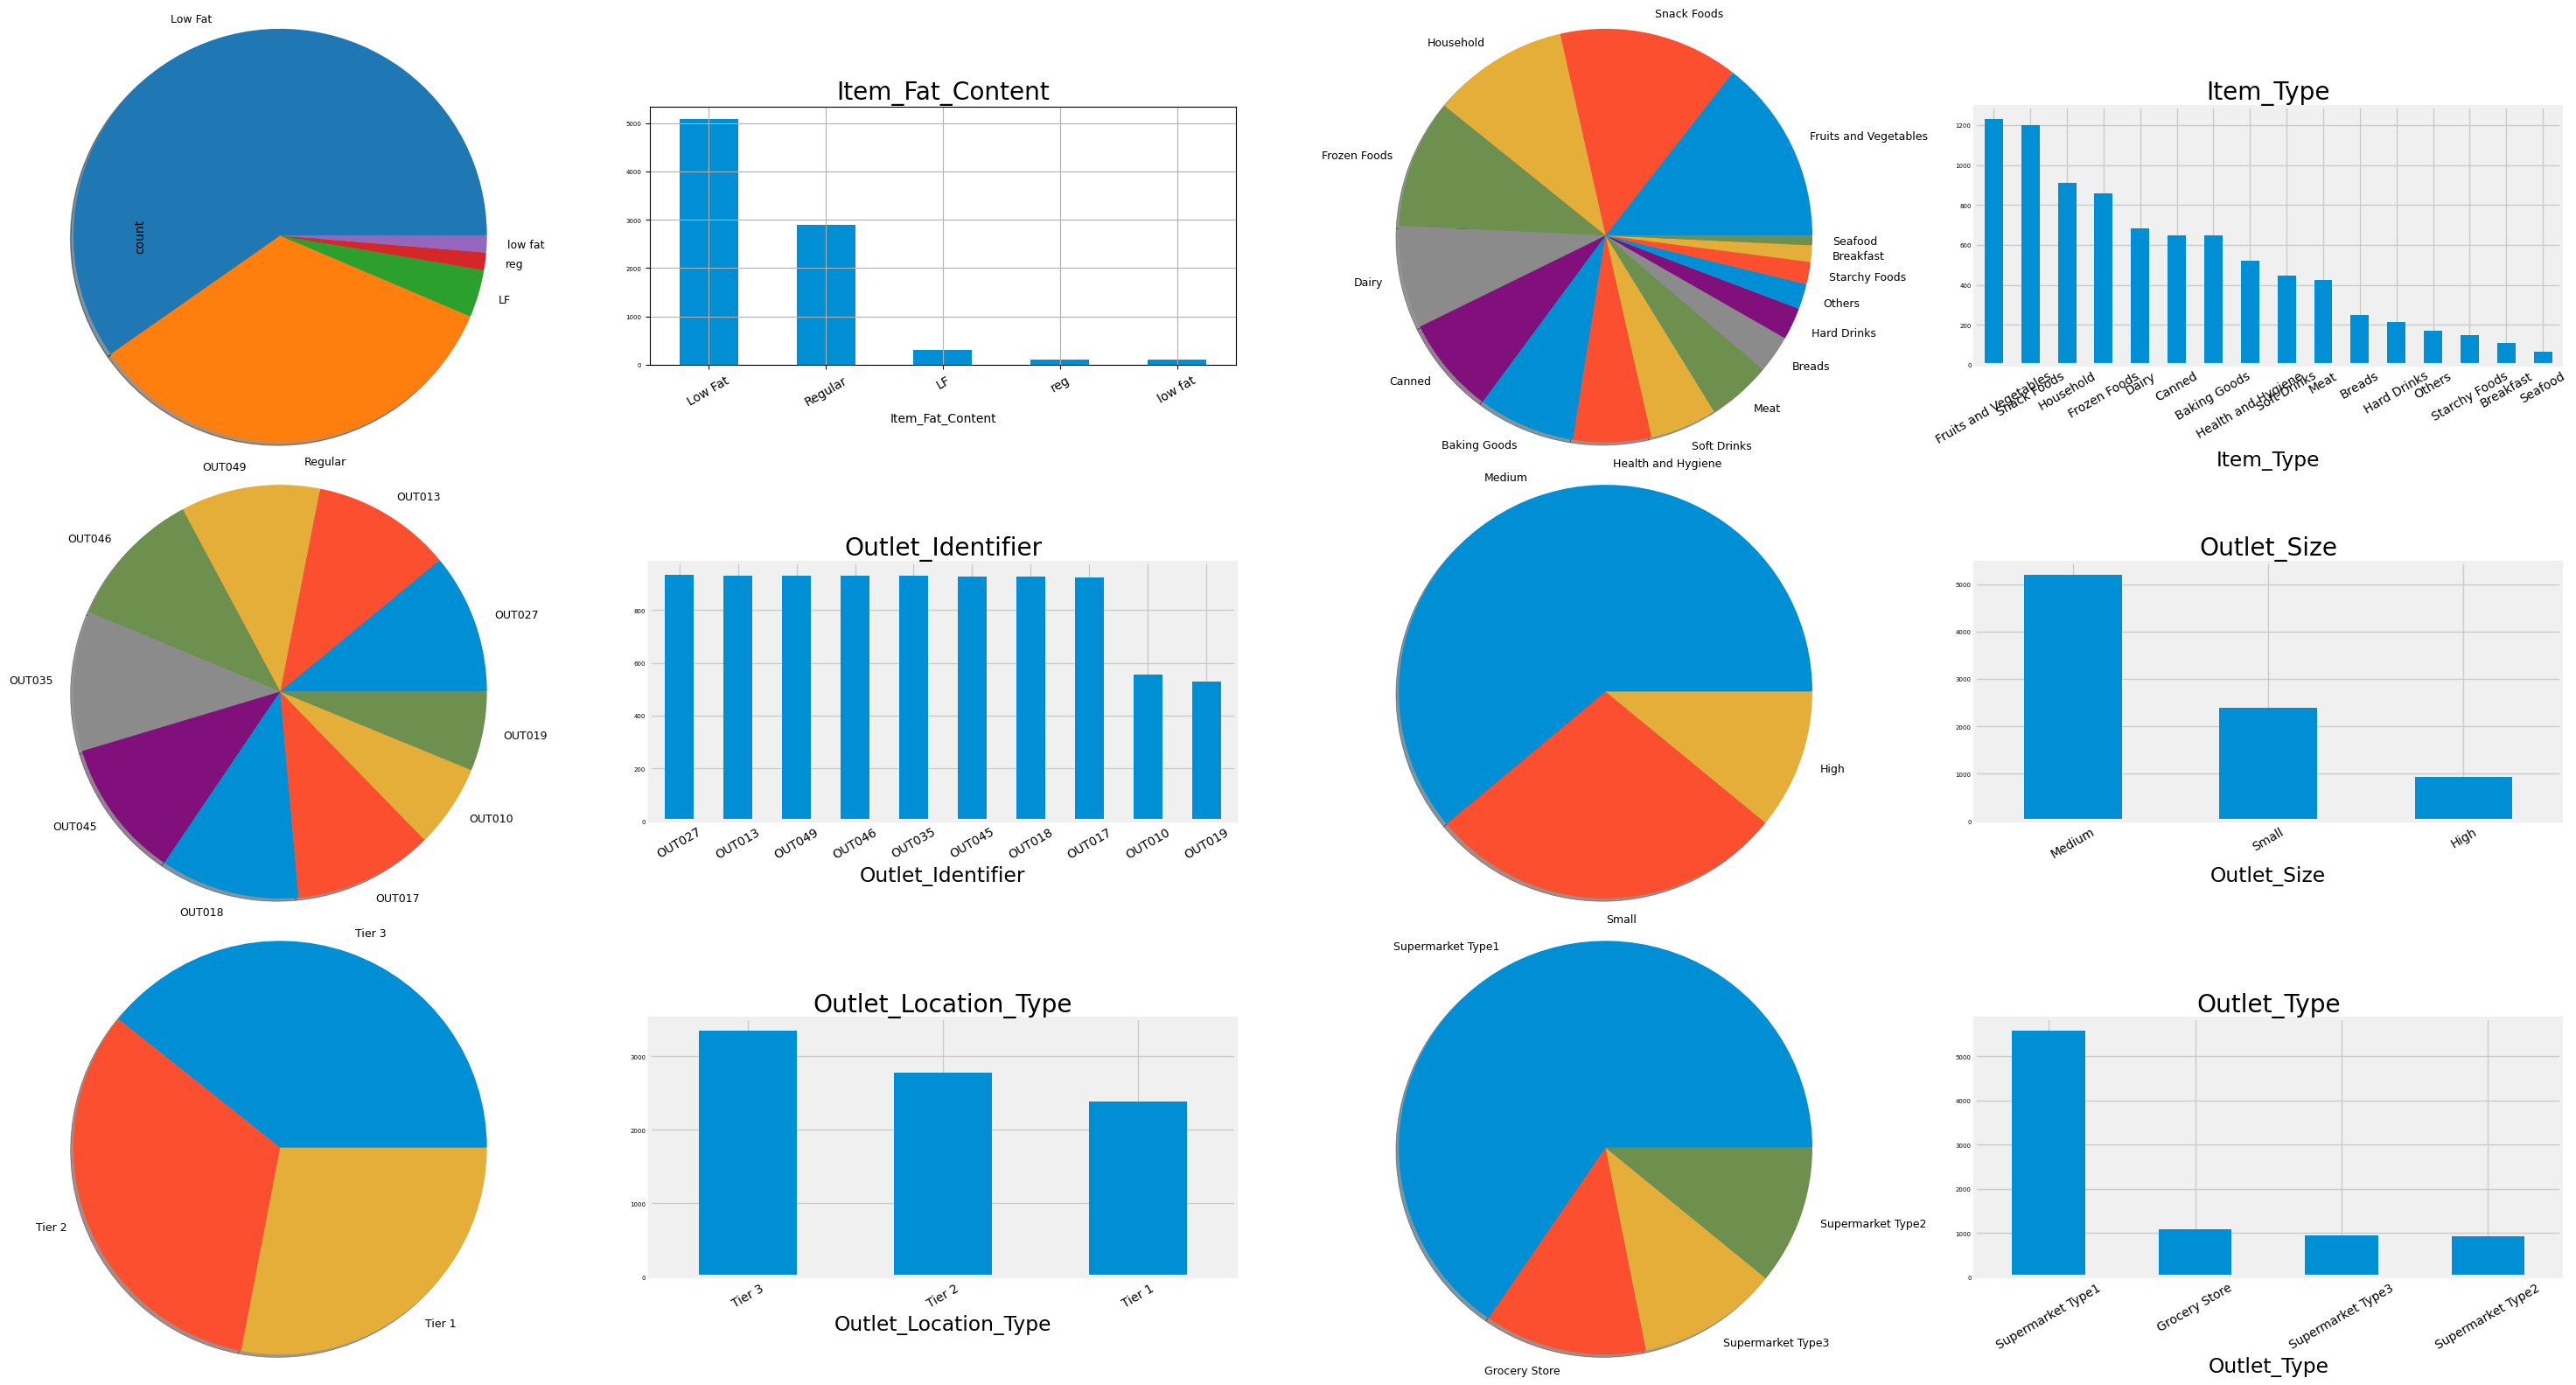

In [18]:
a=1
for C in cat:
    plt.subplot(4, 4, a)
    X[C].value_counts().plot.pie(shadow=True,radius=2,textprops={'fontsize': 9})
    a +=1
    plt.subplot(4, 4, a)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    X[C].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(30,20)
    plt.title('{0}'.format(C))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=5)
    plt.xticks(rotation=30)
    a+=1

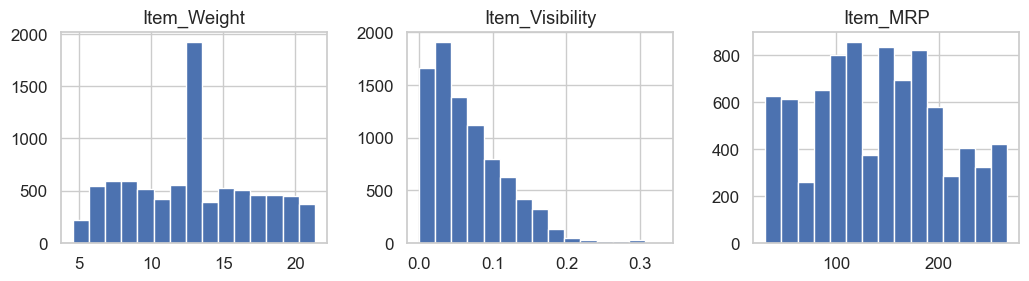

In [19]:
sns.set(style='whitegrid',font_scale=1.1,)
X[['Item_Weight', 'Item_Visibility', 'Item_MRP']].hist(bins=15, figsize=(15, 6), layout=(2, 4));

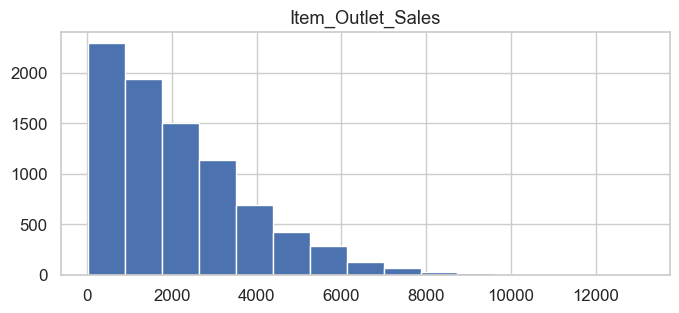

In [20]:
pd.DataFrame(y).hist(bins=15, figsize=(7, 3))
plt.title('Item_Outlet_Sales')
plt.show()

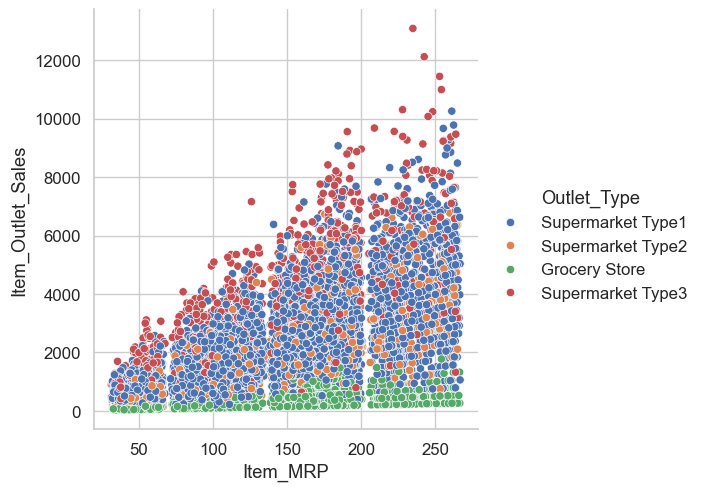

In [22]:
sns.pairplot(data=df, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', height=5)

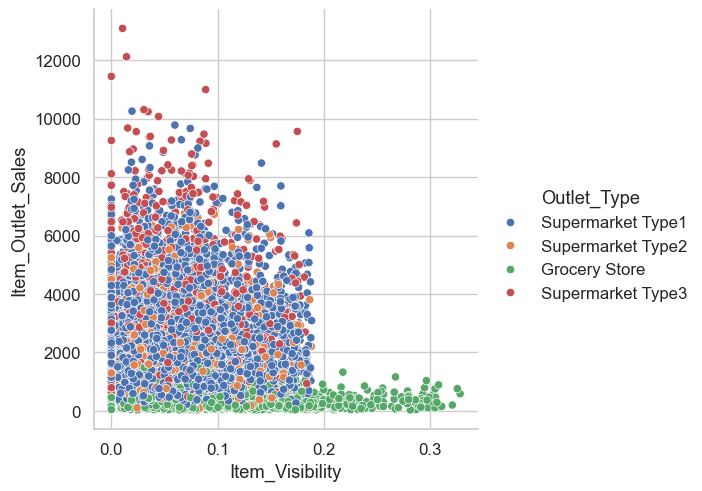

In [23]:
sns.pairplot(data=df, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', height=5)

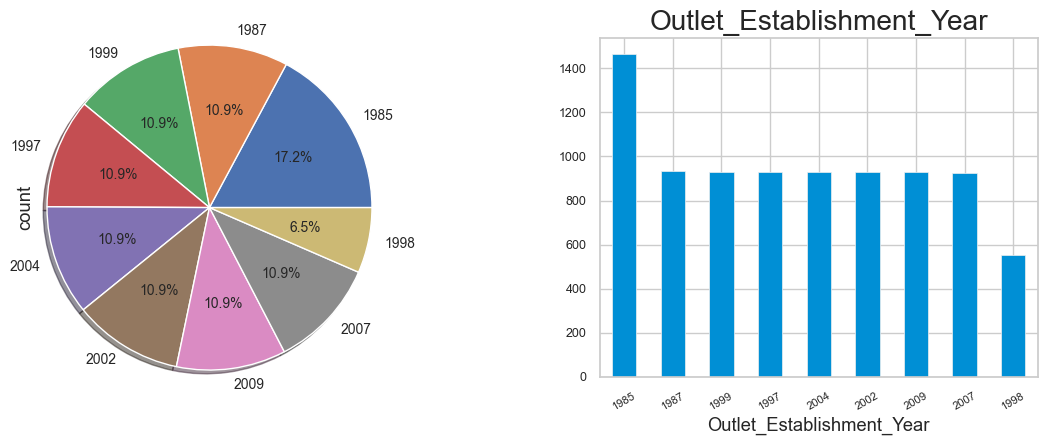

In [24]:
a = 1
num1=[ 'Outlet_Establishment_Year']
for cols in num1:
    plt.subplot(1, 2, a)
    X[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 10} )
    a +=1
    plt.subplot(1, 2, a)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    X[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(12,4)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    a+=1
    break

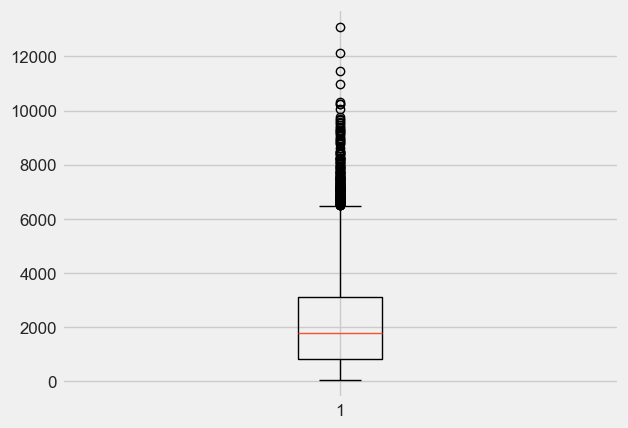

In [25]:
plt.boxplot(y)
plt.show()

In [26]:
y=y.values
y=y.reshape(-1,1)

In [27]:
# Scaling

In [28]:
sc = StandardScaler()
scX= StandardScaler()
y=sc.fit_transform(y)
X[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]=scX.fit_transform(X[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']])

In [29]:
# Encoding

In [30]:
oh1 =OneHotEncoder(handle_unknown="ignore")
ct1 = ColumnTransformer(transformers = [('encoder',oh1,[1,3,9])], remainder ='passthrough')
X = np.array(ct1.fit_transform(X))

In [31]:
oh2 =OneHotEncoder(handle_unknown="ignore")
ct2= ColumnTransformer(transformers = [('encoder', oh2,[28])], remainder ='passthrough')
X = np.array(ct2.fit_transform(X))

In [32]:
le1 = LabelEncoder()
le2 = LabelEncoder()
X[:,39] = le1.fit_transform(X[:,39])
X[:,40] = le2.fit_transform(X[:,40])

In [33]:
# Splitting the dataset into the Training set and Test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
# Linear Regression

In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred=regressor.predict(X_test)
y_test = sc.inverse_transform(y_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 793.7143241719059
mse 1149774.4842102928
Rmse 1072.275377041874


In [38]:
# XGBoost

In [39]:
my_model = XGBRegressor(alpha=0.9,learning_rate=0.05, max_depth=5,n_estimators=80, random_state=30)
my_model.fit(X_train, y_train,verbose=False)

XGBRegressor(alpha=0.9, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, ...)

In [40]:
y_pred = my_model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)  # Reshape to 2D array with a single column
y_pred = sc.inverse_transform(y_pred)

In [41]:
print("mae", mean_absolute_error(y_test, y_pred))
print("mse", mean_squared_error(y_test, y_pred))
print("Rmse", np.sqrt(mean_squared_error(y_test, y_pred)))

mae 717.91240517034
mse 1054687.9659117816
Rmse 1026.980022158066


In [42]:
# Gradient Boosting Regressor

In [43]:
# Train the model
model = GradientBoostingRegressor(alpha=0.9, learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=10)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Reshape to 2D array with a single column
y_pred = y_pred.reshape(-1, 1)

# Inverse transform the predictions
y_pred = sc.inverse_transform(y_pred)

# Calculate and print evaluation metrics
print("mae", mean_absolute_error(y_test, y_pred))
print("mse", mean_squared_error(y_test, y_pred))
print("Rmse", np.sqrt(mean_squared_error(y_test, y_pred)))

mae 722.8937116005973
mse 1073114.3848717927
Rmse 1035.9123442028254


In [44]:
# Pred on Test

In [45]:
test = pd.read_csv('Test (1).csv').iloc[:,1:]

In [46]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [47]:
pd.DataFrame(test).isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [48]:
test[['Item_Weight']] = imputer1.transform(test[['Item_Weight']])
test[['Outlet_Size']] = imputer2.transform(test[['Outlet_Size']])

In [49]:
pd.DataFrame(test).isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [50]:
test[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]=scX.transform(test[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']])

In [51]:
test = np.array(ct1.transform(test))
test = np.array(ct2.transform(test))

In [52]:
test[:,39] = le1.transform(test[:,39])
test[:,40] = le2.transform(test[:,40])

In [53]:
my_model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=10)
my_model.fit(X, y)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=3,
                          n_estimators=80, random_state=10)

In [54]:
y_test_pred = my_model.predict(test)

In [55]:
# Reshape to 2D array with a single column
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Inverse transform the predictions and actual values
y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test)

# Calculate and print evaluation metrics
print("mae", mean_absolute_error(y_test, y_pred))
print("mse", mean_squared_error(y_test, y_pred))
print("Rmse", np.sqrt(mean_squared_error(y_test, y_pred)))

mae 1233545.4690090779
mse 3124693669865.6694
Rmse 1767680.307596843


In [56]:
pd.DataFrame(y_test_pred).head(15)

,0
0,-0.296079
1,-0.463927
2,-0.901313
3,0.160681
4,2.223384
5,-0.154079
6,-0.876005
7,0.019109
8,-0.396378
9,0.570824


In [57]:
final = pd.read_csv('Test (1).csv')
final['Item_Outlet_Sales']=y_test_pred
final=final.drop(['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
final.to_csv("Final_Test_Pred.csv",index=False)

In [58]:
print(final['Item_Outlet_Sales'].min()) 

-1.219685168828845
